In [1]:
# numpy and pandas for data manipulation
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split

# sklearn preprocessing for dealing with categorical variables
from sklearn.preprocessing import LabelEncoder

# File system manangement
import os

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns


In [16]:
df = pd.read_csv("fin_health.csv")

In [17]:
df.sample(10)

,ID,country,owner_age,attitude_stable_business_environment,attitude_worried_shutdown,compliance_income_tax,perception_insurance_doesnt_cover_losses,perception_cannot_afford_insurance,personal_income,business_expenses,...,has_internet_banking,has_debit_card,future_risk_theft_stock,business_age_months,medical_insurance,funeral_insurance,motivation_make_more_money,uses_friends_family_savings,uses_informal_lender,Target
7391,ID_6B0F4F,D,39,Yes,No,No,Yes,Yes,150.0,960.0,...,NaN,NaN,No,6.0,Never had,Never had,Yes,NaN,NaN,Low
1468,ID_27F96X,D,34,No,No,No,Don't know,Don't know,400.0,840.0,...,NaN,NaN,Yes,1.0,Never had,Never had,NaN,NaN,NaN,Low
2329,ID_XENFRR,B,70,Yes,Yes,No,Don't know,Don't know,1300.0,700.0,...,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Used to have but don't have now,Used to have but don't have now,Low
1332,ID_NIUD1A,B,65,Yes,Yes,No,Yes,No,1726.0,3662.0,...,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Never had,Used to have but don't have now,Medium
8419,ID_A753LC,A,45,Yes,Yes,No,Don't know,No,6000.0,60000.0,...,Never had,Never had,NaN,2.0,Never had,Have now,NaN,Never had,Never had,Medium
8579,ID_31YK6F,C,32,No,No,No,Yes,No,200000.0,120000.0,...,Never had,Never had,Yes,NaN,NaN,NaN,Yes,Have now,Never had,Low
8331,ID_8X7GFL,D,62,Yes,Yes,No,No,Yes,900.0,NaN,...,NaN,NaN,No,0.0,Have now,Never had,NaN,NaN,NaN,Medium
2966,ID_MAS41R,A,32,Yes,Yes,Yes,No,Yes,19200.0,7500.0,...,Never had,Have now,NaN,5.0,Never had,Have now,NaN,Never had,Never had,Medium
7332,ID_CJ8MO7,A,28,Yes,Yes,No,Yes,Yes,5500.0,300.0,...,Never had,Never had,NaN,2.0,Have now,Have now,NaN,Never had,Never had,Medium
2556,ID_DSP6W2,D,57,Yes,Yes,No,No,No,400.0,3600.0,...,NaN,NaN,No,4.0,Never had,Never had,NaN,NaN,NaN,Low


In [18]:
X = df.drop(columns=['ID', 'Target'])
y = df['Target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

#### Examine the Distribution of the Target Column

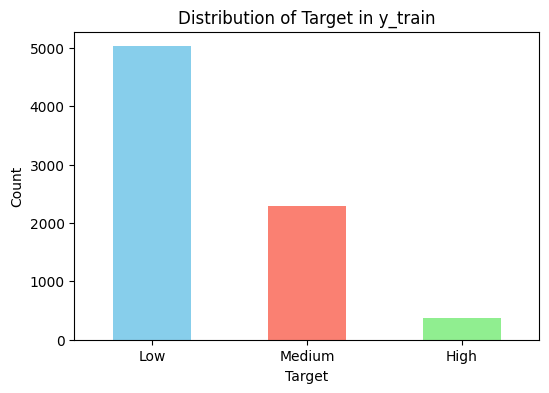

In [21]:

# Count occurrences of each category
target_counts = y_train.value_counts()

# Plot
plt.figure(figsize=(6,4))
target_counts.plot(kind='bar', color=['skyblue', 'salmon', 'lightgreen'])
plt.title('Distribution of Target in y_train')
plt.xlabel('Target')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


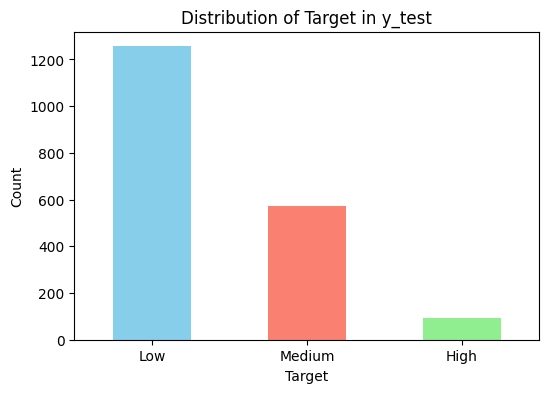

In [22]:

# Count occurrences of each category
target_counts = y_test.value_counts()

# Plot
plt.figure(figsize=(6,4))
target_counts.plot(kind='bar', color=['skyblue', 'salmon', 'lightgreen'])
plt.title('Distribution of Target in y_test')
plt.xlabel('Target')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


#### Examine Missing Values

In [23]:
# Function to calculate missing values by column# Funct 
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [24]:
# Missing values statistics
missing_values = missing_values_table(X_train)
missing_values.head(20)

Your selected dataframe has 37 columns.
There are 35 columns that have missing values.


,Missing Values,% of Total Values
uses_friends_family_savings,3611,46.9
uses_informal_lender,3610,46.9
motivation_make_more_money,3453,44.9
funeral_insurance,3339,43.4
medical_insurance,3339,43.4
business_age_months,3284,42.7
future_risk_theft_stock,3262,42.4
has_debit_card,3223,41.9
has_internet_banking,3223,41.9
has_loan_account,3220,41.9


When it comes time to build our machine learning models, we will have to fill in these missing values (known as imputation). In later work, we will use models such as XGBoost that can handle missing values with no need for imputation. Another option would be to drop columns with a high percentage of missing values, although it is impossible to know ahead of time if these columns will be helpful to our model. Therefore, we will keep all of the columns for now.

#### Column Types

In [25]:
X_train.dtypes.value_counts()

object     31
float64     5
int64       1
Name: count, dtype: int64

Let's now look at the number of unique entries in each of the object (categorical) columns.

In [29]:
# Number of unique classes in each object column
X_train.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

country                                                             4
attitude_stable_business_environment                                3
attitude_worried_shutdown                                           3
compliance_income_tax                                               4
perception_insurance_doesnt_cover_losses                            3
perception_cannot_afford_insurance                                  3
motor_vehicle_insurance                                             4
has_mobile_money                                                    5
current_problem_cash_flow                                           3
has_cellphone                                                       2
owner_sex                                                           2
offers_credit_to_customers                                          3
attitude_satisfied_with_achievement                                 4
has_credit_card                                                     5
keeps_financial_reco

Most of the categorical variables have a relatively small number of unique entries. We will need to find a way to deal with these categorical variables!

#### Encoding Categorical Variables

for categorical variables with many classes, one-hot encoding is the safest approach because it does not impose arbitrary values to categories. The only downside to one-hot encoding is that the number of features (dimensions of the data) can explode with categorical variables with many categories. To deal with this, we can perform one-hot encoding followed by PCA or other dimensionality reduction methods to reduce the number of dimensions (while still trying to preserve information).


In this notebook, we will use Label Encoding for any categorical variables with only 2 categories and One-Hot Encoding for any categorical variables with more than 2 categories. This process may need to change as we get further into the project, but for now, we will see where this gets us. (We will also not use any dimensionality reduction in this notebook but will explore in future iterations).

#### Label Encoding and One-Hot Encoding

In [30]:
# Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in X_train:
    if X_train[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(X_train[col].unique())) <= 2:
            # Train on the training data
            le.fit(X_train[col])
            # Transform both training and testing data
            X_train[col] = le.transform(X_train[col])
            X_test[col] = le.transform(X_test[col])
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
print('%d columns were label encoded.' % le_count)

0 columns were label encoded.


<mark>note that there is some variables contain only 2 classes but because missing vals "nan" it counts as 3 </mark>

In [31]:
from sklearn.preprocessing import OneHotEncoder

# Select categorical features
categorical_features = X_train.select_dtypes(include=['object']).columns.tolist()

# Create encoder
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Fit on train and transform train
X_train_encoded = encoder.fit_transform(X_train[categorical_features])

# Transform test
X_test_encoded = encoder.transform(X_test[categorical_features])

# Convert to DataFrame with proper column names
encoded_cols = encoder.get_feature_names_out(categorical_features)
X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=encoded_cols, index=X_train.index)
X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=encoded_cols, index=X_test.index)

# Combine with numeric features
numeric_features = X_train.select_dtypes(include=['int64','float64']).columns.tolist()
X_train_encoded = pd.concat([X_train[numeric_features], X_train_encoded_df], axis=1)
X_test_encoded = pd.concat([X_test[numeric_features], X_test_encoded_df], axis=1)

print("X_train shape:", X_train_encoded.shape)
print("X_test shape:", X_test_encoded.shape)


X_train shape: (7694, 155)
X_test shape: (1924, 155)


##### Fix Column names

In [32]:
import re
# Clean column names (in case not done yet)
def clean_column_names(df):
    df.columns = [re.sub(r'[^A-Za-z0-9_]+', '_', col) for col in df.columns]
    cols = pd.Series(df.columns)
    for dup in cols[cols.duplicated()].unique():
        cols[cols == dup] = [f"{dup}_{i}" if i != 0 else dup for i in range(sum(cols == dup))]
    df.columns = cols
    return df

X_train_encoded = clean_column_names(X_train_encoded.copy())
X_test_encoded = clean_column_names(X_test_encoded.copy())

In [33]:
X_train_encoded.columns

Index(['owner_age', 'personal_income', 'business_expenses',
       'business_turnover', 'business_age_years', 'business_age_months',
       'country_A', 'country_B', 'country_C', 'country_D',
       ...
       'uses_friends_family_savings_Used_to_have_but_don_t_have_now',
       'uses_friends_family_savings_Used_to_have_but_don_t_have_now_1',
       'uses_friends_family_savings_nan', 'uses_informal_lender_Don_t_know',
       'uses_informal_lender_Don_t_know_Do_not_show_',
       'uses_informal_lender_Have_now', 'uses_informal_lender_Never_had',
       'uses_informal_lender_Used_to_have_but_don_t_have_now',
       'uses_informal_lender_Used_to_have_but_don_t_have_now_1',
       'uses_informal_lender_nan'],
      dtype='object', length=155)

#### Back to Exploratory Data Analysis

##### Anomalies

One problem we always want to be on the lookout for when doing EDA is anomalies within the data. These may be due to mis-typed numbers, errors in measuring equipment, or they could be valid but extreme measurements. One way to support anomalies quantitatively is by looking at the statistics of a column using the describe method.

#### Correlations

The correlation coefficient is not the greatest method to represent "relevance" of a feature, but it does give us an idea of possible relationships within the data. 

In [38]:
# Map Target to numeric
y_train_numeric = y_train.map({'Low': 0, 'Medium': 1, 'High': 2})

# Compute correlations
correlations = X_train_encoded.corrwith(y_train_numeric).sort_values()

# Display correlations
print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))


Most Positive Correlations:
 uses_friends_family_savings_Have_now    0.164361
has_debit_card_Have_now                 0.166807
marketing_word_of_mouth_Yes             0.166919
has_internet_banking_Have_now           0.177470
motivation_make_more_money_nan          0.182778
future_risk_theft_stock_nan             0.208703
country_A                               0.225310
compliance_income_tax_Yes               0.228918
keeps_financial_records_Yes_always      0.239107
motor_vehicle_insurance_Have_now        0.268308
has_insurance_Yes                       0.294409
has_loan_account_Have_now               0.299841
medical_insurance_Have_now              0.309624
has_credit_card_Have_now                0.333878
funeral_insurance_Have_now              0.621168
dtype: float64

Most Negative Correlations:
 funeral_insurance_Never_had                                                                 -0.272043
motor_vehicle_insurance_nan                                                              

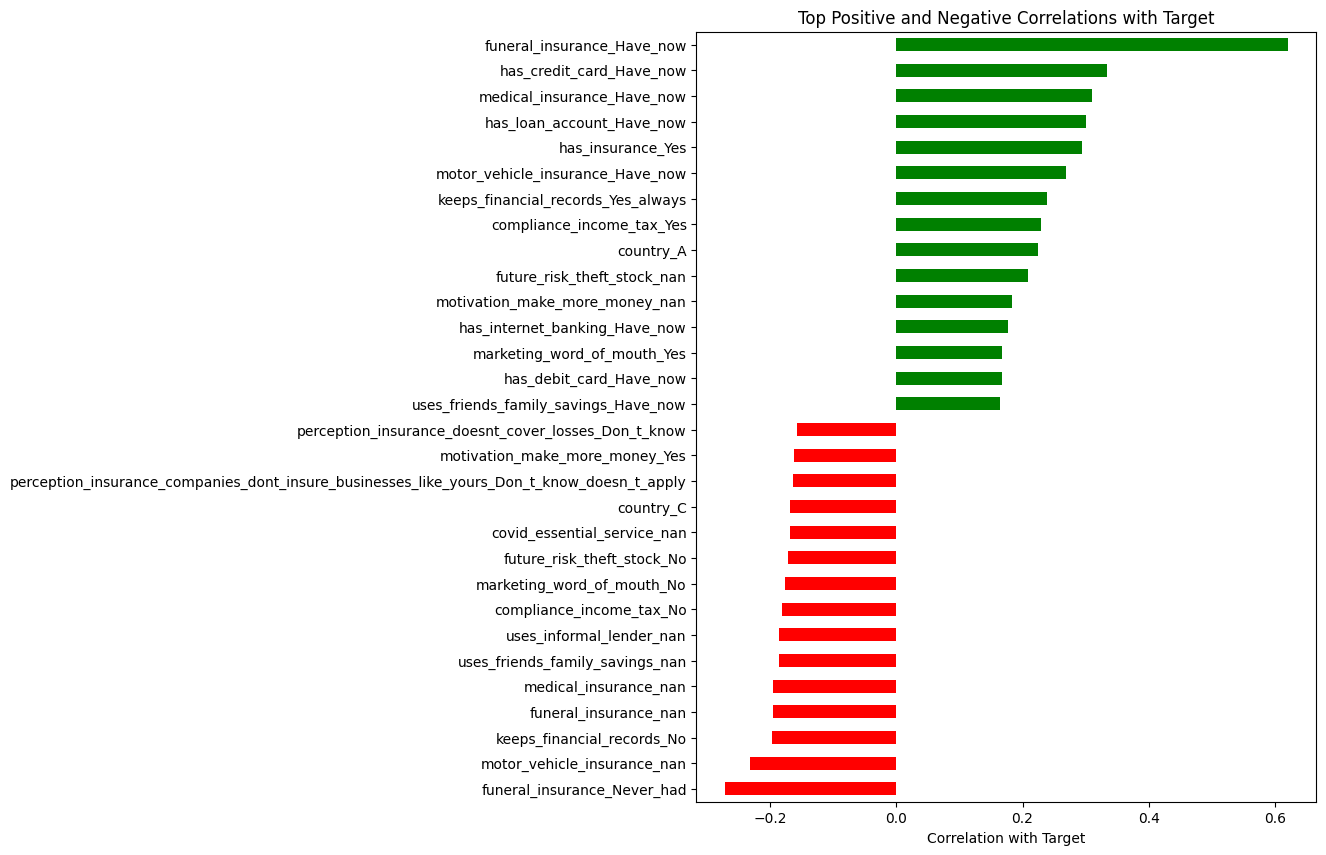

In [46]:
import matplotlib.pyplot as plt

# Most positive correlations
top_pos = correlations.tail(15)

# Most negative correlations
top_neg = correlations.head(15)

# Combine
top_corr = pd.concat([top_neg, top_pos])

# Plot
plt.figure(figsize=(8,10))
top_corr.plot(kind='barh', color=['red' if x<0 else 'green' for x in top_corr])
plt.xlabel('Correlation with Target')
plt.title('Top Positive and Negative Correlations with Target')
plt.show()


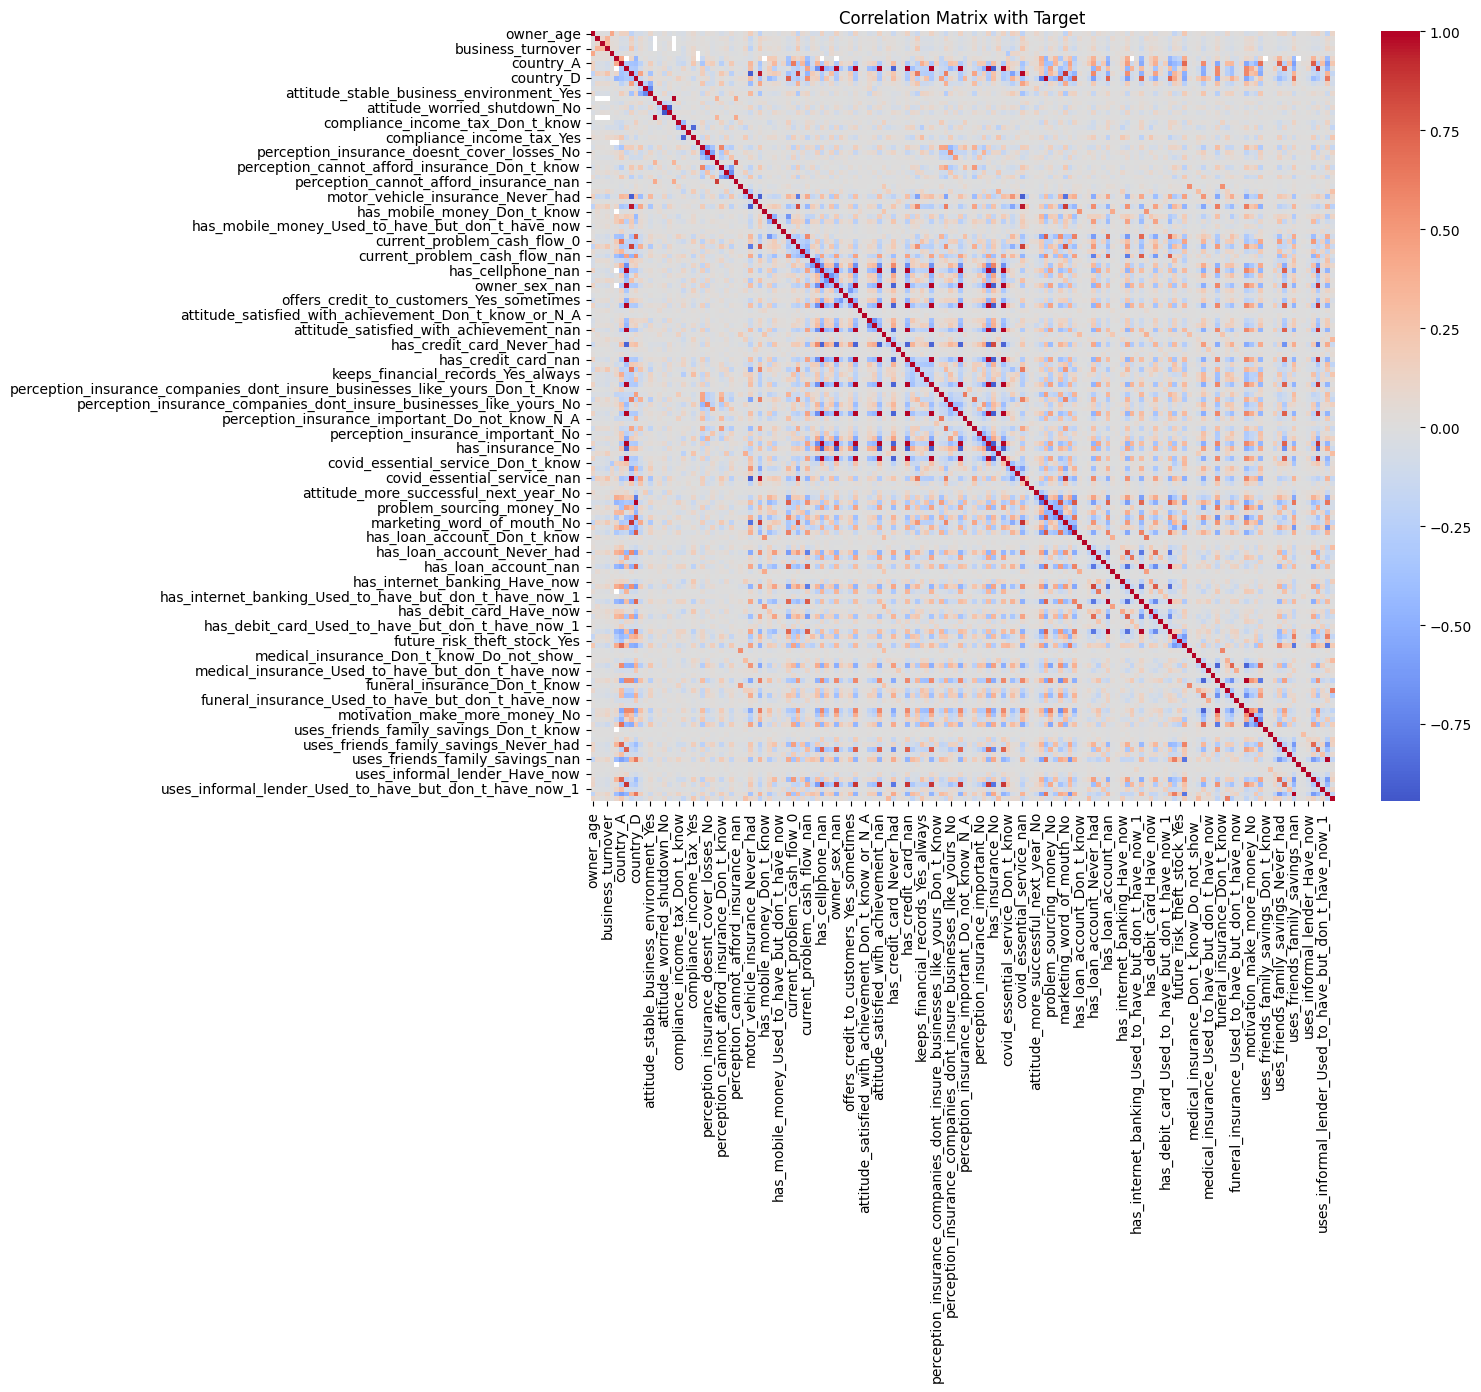

In [47]:
import seaborn as sns

# Combine X_train_encoded and target numeric
train_corr = X_train_encoded.copy()
train_corr['Target'] = y_train_numeric

plt.figure(figsize=(12,10))
sns.heatmap(train_corr.corr(), cmap='coolwarm', center=0)
plt.title('Correlation Matrix with Target')
plt.show()


Let's take a look at some of more significant correlations: the `funeral_insurance_Have_now` is the most positive correlation.


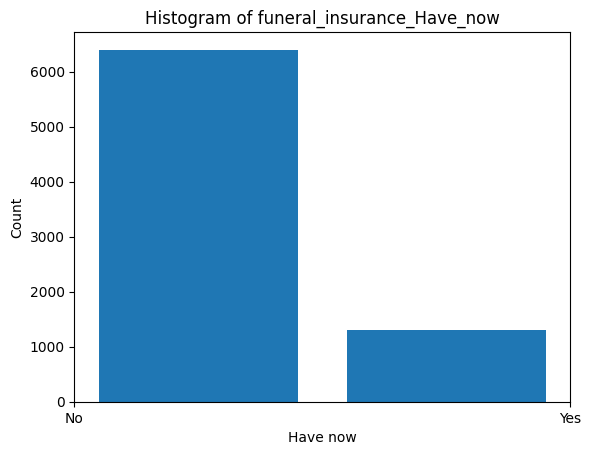

In [39]:
import matplotlib.pyplot as plt

plt.hist(X_train_encoded['funeral_insurance_Have_now'], bins=2, rwidth=0.8)
plt.xlabel('Have now')
plt.ylabel('Count')
plt.title('Histogram of funeral_insurance_Have_now')
plt.xticks([0,1], ['No', 'Yes'])
plt.show()


#### Owner Age

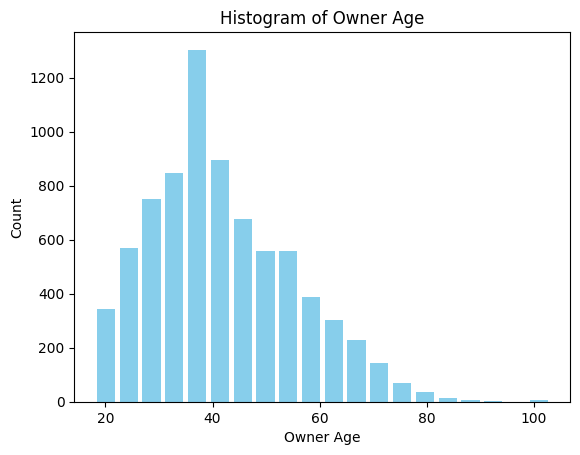

In [42]:
import matplotlib.pyplot as plt

plt.hist(X_train['owner_age'], bins=20, rwidth=0.8, color='skyblue')
plt.xlabel('Owner Age')
plt.ylabel('Count')
plt.title('Histogram of Owner Age')
plt.show()


<mark>Outlier Detected</mark>

To visualize the effect of the owner_age on the target, we will next make a <mark>kernel density estimation plot (KDE)</mark> colored by the value of the target.A kernel density estimate plot shows the distribution of a single variable and can be thought of as a smoothed histogram (it is created by computing a kernel, usually a Gaussian, at each data point and then averaging all the individual kernels to develop a single smooth curve). 

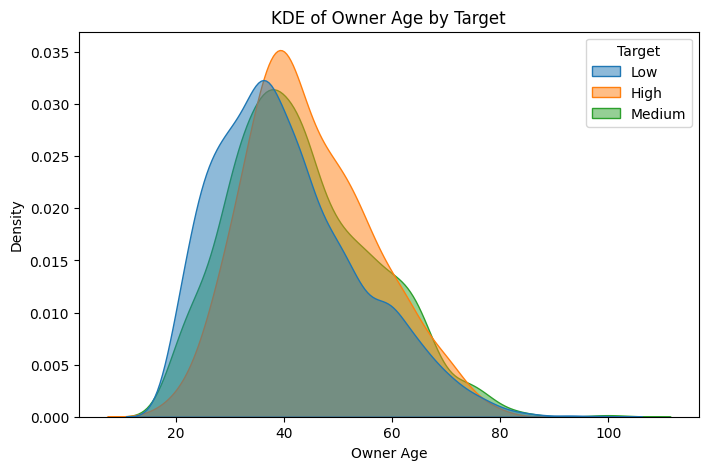

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

# Combine X_train and y_train into one DataFrame
train_plot = X_train.copy()
train_plot['Target'] = y_train  # keep as categorical

# KDE plot
plt.figure(figsize=(8,5))
sns.kdeplot(data=train_plot, x='owner_age', hue='Target', fill=True, common_norm=False, alpha=0.5)
plt.title('KDE of Owner Age by Target')
plt.xlabel('Owner Age')
plt.ylabel('Density')
plt.show()


The `target == Low` curve skews towards the younger end of the range. Although this is not significant corr, this variable is likely going to be useful in ml model because it deos affect the target.

#### Country
`country_A` and `country_C` show strong positive and negative corr respectivally.

Correlation of country features with Target:
country_A    0.225310
country_B    0.002897
country_C   -0.168693
country_D   -0.064923
dtype: float64


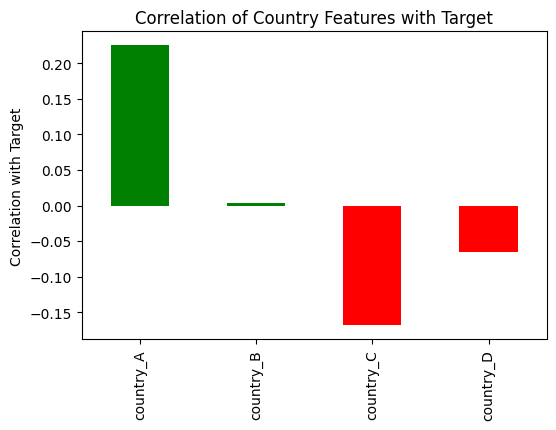

In [54]:
# Map Target to numeric
y_train_numeric = y_train.map({'Low': 0, 'Medium': 1, 'High': 2})

# Select country one-hot columns
country_cols = ['country_A', 'country_B', 'country_C', 'country_D']

# Compute correlations with target
country_corr = X_train_encoded[country_cols].corrwith(y_train_numeric)

print("Correlation of country features with Target:")
print(country_corr)

import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
country_corr.plot(kind='bar', color=['green' if x>0 else 'red' for x in country_corr])
plt.ylabel('Correlation with Target')
plt.title('Correlation of Country Features with Target')
plt.show()


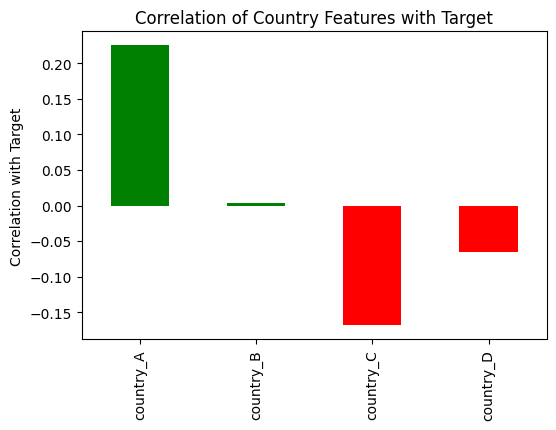

In [52]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
country_corr.plot(kind='bar', color=['green' if x>0 else 'red' for x in country_corr])
plt.ylabel('Correlation with Target')
plt.title('Correlation of Country Features with Target')
plt.show()


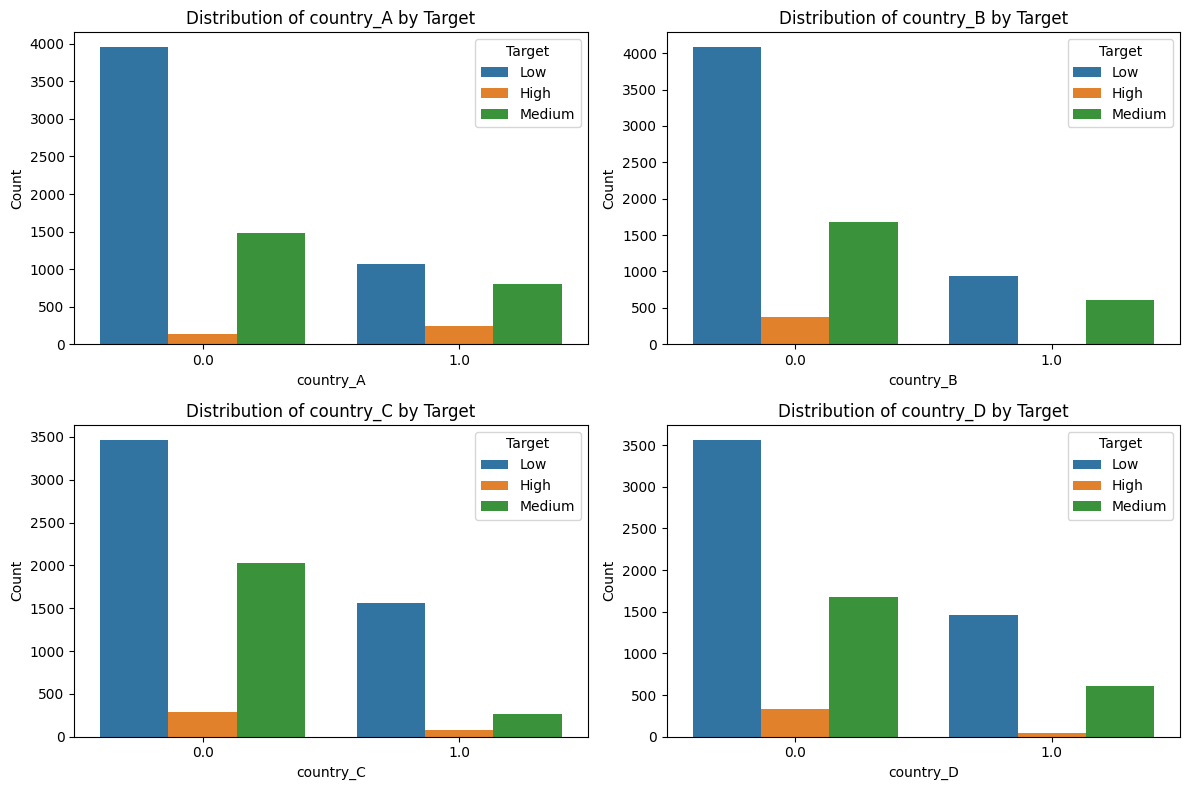

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

# Combine X_train_encoded and y_train into one DataFrame
train_plot = X_train_encoded[country_cols].copy()
train_plot['Target'] = y_train  # keep as categorical

# Plot each country feature
plt.figure(figsize=(12,8))
for i, col in enumerate(country_cols, 1):
    plt.subplot(2, 2, i)
    sns.countplot(data=train_plot, x=col, hue='Target')
    plt.title(f'Distribution of {col} by Target')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.legend(title='Target')

plt.tight_layout()
plt.show()


`business_expenses`

# Save Data For Feature Engineering

In [ ]:
X_train_encoded.to_csv('data/X_train.csv', index=False)
X_test_encoded.to_csv('data/X_test.csv', index=False)
y_train.to_csv('data/y_train.csv', index=False)
y_test.to_csv('data/y_test.csv', index=False)